In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split

def loadData():
    #df = pd.read_csv('/sgoinfre/goinfre/Perso/pdespres/ensdata/train_redux.csv')
    #y = pd.read_csv('/sgoinfre/goinfre/Perso/pdespres/ensdata/y.csv', sep=';', usecols=[1])
    df = pd.read_csv('E:\\Downloads\\train_redux_QC_05_000001.csv')
    y = pd.read_csv('E:\\Downloads\\y.csv', sep=';', usecols=[1])
    print("Datas loaded")
    return df, y

df, y = loadData()
print(df.shape)

Datas loaded
(26500, 16004)


In [2]:
from sklearn.ensemble import IsolationForest

def buildforest(train, y):
    forest = IsolationForest(n_estimators=200, contamination=0.1, random_state=42)
    forest.fit(train, y)
    return forest

%time iforest = buildforest(df, y)

Wall time: 25min 17s


In [3]:
#outlier = iforest.predict(df)
anomaly_score = iforest.decision_function(df)
#anomaly_score[0]
df['score'] = anomaly_score

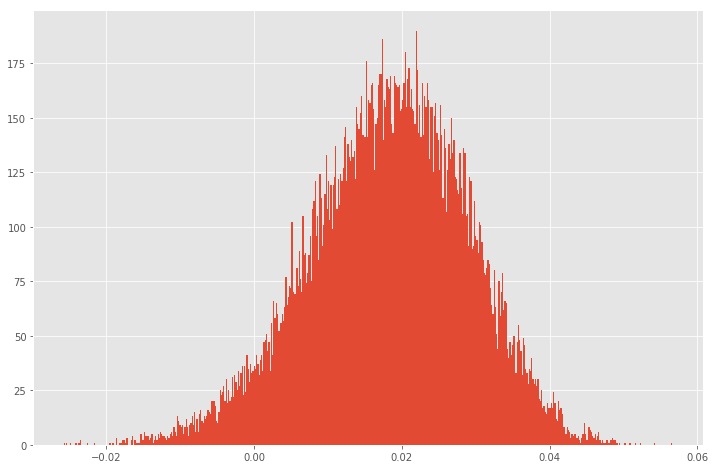

In [4]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.hist(anomaly_score, bins=500);

In [4]:
rowtodrop = []
counter = 0
for n in range(len(df)):
    if (df['score'][n] < -0.02):
        counter= counter+1
        rowtodrop.append(n)
        print(n, df['score'][n])
print (counter)
print(rowtodrop)
todrop = pd.DataFrame(rowtodrop)
todrop.to_csv('E:\\Downloads\\outliers.csv', index=False)

1105 -0.0229213195032
2450 -0.0234275831628
2661 -0.0210144265633
4555 -0.0220719131124
5874 -0.0209916930714
8514 -0.0228499158203
9500 -0.0257459124027
11525 -0.0232416981003
11875 -0.0204102117145
13202 -0.0206786829843
14247 -0.0214682861521
15417 -0.0218335569316
16925 -0.0204825933293
17943 -0.027887444957
18525 -0.0307993336445
20114 -0.0232018801376
23905 -0.0204949024837
24130 -0.0312838742145
18
[1105, 2450, 2661, 4555, 5874, 8514, 9500, 11525, 11875, 13202, 14247, 15417, 16925, 17943, 18525, 20114, 23905, 24130]
